In [3]:
import speech_recognition as sr
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
import numpy as np

In [26]:
r = sr.Recognizer()

In [57]:
# test = sr.AudioFile('Test.wav')
# with test as source:
#     audio = r.record(source)

NameError: name 'r' is not defined

In [86]:
wave, fs = librosa.load('Cut1.wav')
wave = wave[:20000]

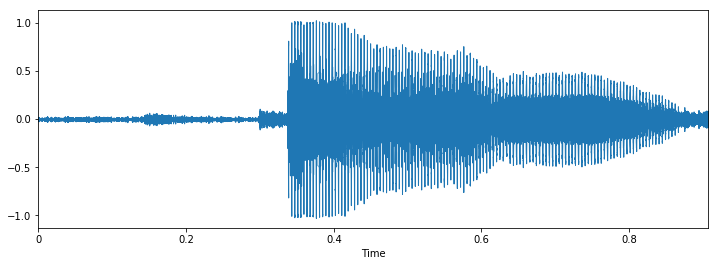

In [87]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(wave, sr=fs)

In [88]:
print(fs)
print(len(wave)/fs) #408 ms
ipd.Audio(wave, rate=fs)

22050
0.9070294784580499


In [89]:
frame_len = int(20 * fs /1000) # 20ms
frame_shift = int(10 * fs /1000) # 10ms
# calculate RMS
rms = librosa.feature.rmse(wave, frame_length=frame_len, hop_length=frame_shift)
rms = rms[0]
rms = librosa.util.normalize(rms, axis=0)

# calculate zero-crossing rate
zrc = librosa.feature.zero_crossing_rate(wave, frame_length=frame_len, hop_length=frame_shift, threshold=0)
zrc = zrc[0]
#zrc = librosa.util.normalize(zrc, axis=0)

In [91]:
len(zrc)

91

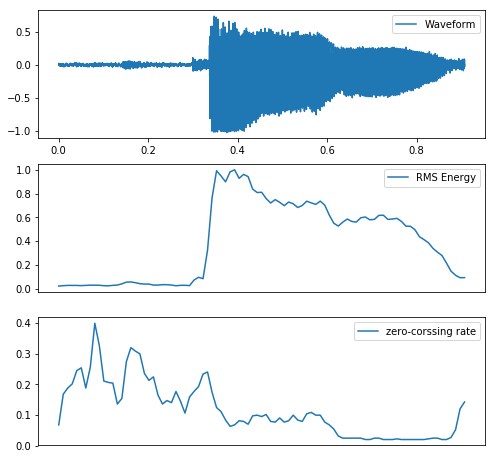

In [92]:
plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
t = np.linspace(0, len(wave)/fs, len(wave))
plt.plot(t, wave, label='Waveform')
plt.legend(loc='best')

plt.subplot(3, 1, 2)
plt.plot(rms.T, label='RMS Energy')
plt.xticks([])
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.plot(zrc.T, label='zero-corssing rate')
plt.xticks([])
plt.legend(loc='best')
plt.show()

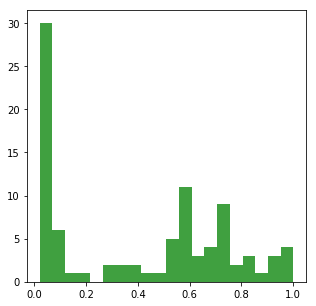

In [93]:
# set threshold of speech and silence
plt.figure(figsize=(5, 5))
n, bins, patches = plt.hist(rms.T, 20, facecolor='g', alpha=0.75)

In [94]:
z = zip(rms,zrc)
i = 0
for x,y in z: 
    if (x > 0.1) | (y > 0.5): 
        i = i + 1
        #print (x,y)

In [95]:
frame_idxs = np.where( (rms > 0.1) | (zrc > 0.5) )[0]

In [96]:
frame_idxs = frame_idxs[:10]

In [97]:
frame_idxs

array([33, 34, 35, 36, 37, 38, 39, 40, 41, 42])

In [98]:
# get start-points and end-points
def getboundaries(frame_idxs):
    #get the first frame index
    start_idxs = [frame_idxs[0]]
    end_idxs = []

    #get the length of list of frame indices
    shapeofidxs = np.shape(frame_idxs)

    #for each index in the list 
    for i in range(shapeofidxs[0]-1):
        #if the next index is in a different frame (difference > 1)
        if (frame_idxs[i + 1] - frame_idxs[i]) != 1:
            #i is an end index 
            end_idxs.append(frame_idxs[i])
            #i+1 is a start index
            start_idxs.append(frame_idxs[i+1])
            
    #last index of the list will be an end index
    end_idxs.append(frame_idxs[-1])
    
    # del the last boundaries if it is both start point and end point.
    if end_idxs[-1] == start_idxs[-1]:
        end_idxs.pop()
        start_idxs.pop()
    assert len(start_idxs) == len(end_idxs), 'Error! Num of start_idxs doesnt match Num of end_idxs.'
    
    #convert into np.array
    start_idxs = np.array(start_idxs)
    end_idxs = np.array(end_idxs)
    
    #from index, convert to time 
    start_t = start_idxs * frame_shift / fs
    end_t = end_idxs * frame_shift / fs
    return start_t, end_t

In [99]:
start_t, end_t = getboundaries(frame_idxs)

array([0.41904762])

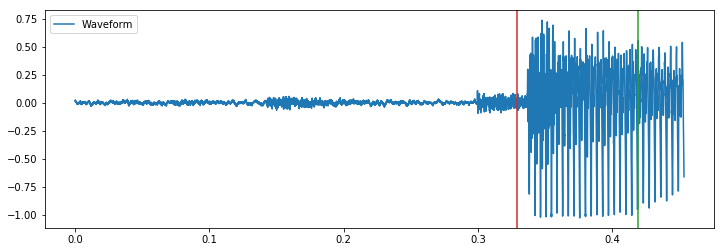

In [103]:
plt.figure(figsize=(12, 4))
t = np.linspace(0, len(wave[:10000])/fs, len(wave[:10000]))
plt.plot(t, wave[:10000], label='Waveform')
for s, e in zip(start_t, end_t):
    plt.axvline(x=s, color='#d62728') # red vertical line
    plt.axvline(x=e, color='#2ca02c') # green vertical line
plt.legend(loc='best')
plt.show()

In [142]:
t[7259]

0.3292392731336626

In [152]:
float("{0:.8f}".format(start_t[0]))

0.3292517

In [119]:
t[7259]

0.3292392731336626

In [156]:
float("{0:.8f}".format(t[7260]))

0.32928463

In [ ]:
for time_value, w_value in zip(t,wave):
    if ()

In [135]:
frames = []
frame = []
isFrame = False
i = 0
for time_value, w_value in zip(t,wave):
    if isFrame == True:
        frame.append(w_value)
    if (abs(start_t[i] - time_value) < 0.00005):
        frame.append(w_value)
        isFrame = True
    elif (abs(end_t[i] - time_value) < 0.00005):
        frames.append(frame)
        frame = []
        isFrame = False
    if isFrame == False and len(frame) ==0:
        i += 1

IndexError: index 1 is out of bounds for axis 0 with size 1

In [133]:
start_t[0] in t

False